# 5장 - 차원 축소를 사용한 데이터 압축

In [2]:
from IPython.display import Image

4장에서 여러 가지 특성 선택 방식을 사용하여 데이터셋의 차원을 축소하는 방법을 배웠다. 차원 축소를 위한 특성 선택의 또 다른 방식은 특성 추출(feature extraction)이다.  

원본 데이터셋을 좀 더 낮은 차원의 새로운 특성 부분 공간으로 변환한다. 데이터 압축은 머신 러닝에서 중요한 주제이다. 현대 기술의 시대에서 생산되고 수집된느 막대한 양의 데이터를 저장하고 분석하는 데 도움이 될 것이다. 

# 주성분 분석을통한 비지도 차원 축소 

특성 선택과 마찬가지로 여러 가지 특성 추출 기법을 사용하여 데이터셋의 특성 개수를 줄일 수 있다. 특성 선택과 특성 추출의 차이는 원본 특성을 유지하느냐에 있다.  

**순차 후진 선택**(sequential backward selection)같은 특성 선택 알고리즘을 사용할 때는 원본 특성을 유지하지만 특성 추출은 새로운 특성 공간으로 데이터를 변환하거나 투영한다.  

차원 축소 관점에서 보면 특성 추출은 대부분의 관련 있는 정보를 유지하면서 데이터를 압축하는 방법으로 이해할 수 있다. 특성 추출이 저장 공간을 절약하거나 학습 알고리즘의 계산 효율성을 향상할 뿐만 아니라 **차원의 저주**(curse of dimensionality)문제를 감소시켜 예측 성능을 향상하기도 한다. 

## 주성분 분석의 주요 단계

PCA에 대해 알아보자. 주로 특성 추출과 차원 축소 용도로 많은 분야에서 널리 사용한다. PCA를 많이 사용하는 애플리케이션에는 탐색적 데이터 분석과 주식 거래 시장의 잡음 제거, 생물정보학 분야에서 게놈(genome) 데이터나 유전자 발현(gene expression)분석 등이 있다.  

PCA는 특성 사이의 상관관계를 기반으로 하여 데이터에 있는 어떤 패턴을 찾을 수 있다. 요약해서 말하면 PCA는 고차원 데이터에서 분산이 가장 큰 방향을 찾고 좀 더 작거나 같은 수의 차원을 갖는 새로운 부분 공간으로 이를 투영한다. 새로운 부분 공간의 직교 좌표(주성분(principal component))는 주어진 조건하에서 분산이 최대인 방향으로 해석할 수 있다. 새로운 특성 축은 아래 그림과 같이 서로 직각을 이룬다.

In [3]:
Image(url='https://git.io/JtsvW', width=400) 

$x_{1}$ 과 $x_{2}$ 는 원본 특성 축이고 PC1과 PC2는 주성분이다.  

PCA 방향은 데이터 스케일에 매우 민감하다. 특성의 스케일이 다르고 모든 특성의 중요도를 동일하게 취급하려면 PCA를 적용하기 전에 특성을 표준화 전처리해야 한다. 

차원 축소를 위한 PCA 알고리즘을 자세히 알아보기 전에 사용할 방법을 몇 단계로 나누어 정리해보자.  
1. d차원 데이터셋을 표준화 전처리한다.
2. 공분산 행렬(covariance matrix)을 만든다.
3. 공분산 행렬을 고유 벡터(eigenvector)와 고윳값(eigenvalue)으로 분해한다. 
4. 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유 벡터의 순위를 매긴다. 
5. 고윳값이 가장 큰 k개의 고유 벡터를 선택한다. 여기서 k는 새로운 특성 부분 공간의 차원이다. 
6. 최상위 k개의 고유 벡터로 투영 행렬(projection matrix) W를 만든다.
7. 투영 행렬 W를 사용해서 d차원 입력 데이터셋 X를 새로운 k차원의 특성 부분 공간으로 변환한다. 

## 주성분 추출 단계

In [4]:
# Wine 데이터셋 로드
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# UCI 머신 러닝 저장소에서 Wine 데이터셋을 다운로드할 수 없을 때
# 다음 주석을 해제하고 로컬 경로에서 데이터셋을 적재하세요:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Wine 데이터셋을 70%와 30% 비율로 훈련 데이터셋과 테스트 데이터셋으로 나누고 
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [6]:
# 데이터를 표준화한다
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


### Note
`X_test_std = sc.transform(X_test)` 대신에 `X_test_std = sc.fit_transform(X_test)` 를 사용했다. 이 경우에 테스트 데이터셋의 평균과 표준편차가 훈련 데이터셋과 매우 비슷하기 때문에 큰 차이가 없다. 하지만 데이터를 변환할 때 훈련 데이터셋에서 학습한 파라미터를 재사용하는 것이 올바를 방법이다. 테스트 데이터셋은 "새로운 본 적 없는" 데이터를 의미하기 때문이다. 

In [7]:
# 공분산 행렬의 고윳값 분해
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\n고윳값 \n%s' % eigen_vals)


고윳값 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


## 총 분산과 설명된 분산

데이터셋 차원을 새로운 특성 부분 공간으로 압축하여 주여야 하기에 가장 많은 정보(분산)를 가진 고유 벡터(주성분) 일부만 선택한다. 고윳값은 고유 벡터의 크기를 결정하므로 고윳값을 내림차순으로 정렬한다. 고윳값 순서에 따라 최상위 k개의 고유 벡터를 선택한다. 가장 정보가 많은 k개의 고유 벡터를 선택하기 전에 고윳값의 **설명된 분산 비율**(explainded vairance ratio)을 그래프 그려보자.

In [8]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

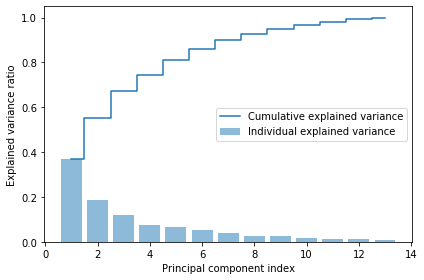

In [9]:
import matplotlib.pyplot as plt


plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

결과 그래프는 첫 번째 주성분이 거의 분산의 40%를 커버하고 있다.  
또 처음 두 개의 주성분이 데이터셋에 있는 분산의 대략 60%를 설명한다.  

설명된 분산 그래프가 랜덤 포레스트로 계산한 특성 중요도를 떠올리게 하지만 PCA는 비지도 학습이다. 클래스 레이블에 관한 정보는 사용하지 않았다. 랜덤 포레스트는 클래스 소속 정보를 사용하여 노드의 불순도를 계산하는 반면, 분산은 특성 축을 따라 값들이 퍼진 정도를 측정한다. 

## 특성 변환

공분산 행렬을 고유 벡터와 고윳값 쌍으로 성공적으로 분해한 후 Wine 데이터셋을 새로운 주성분 축으로 변환하는 나머지 세 단계를 진행한다.  

- 고윳값이 가장 큰 k개의 고유 벡터를 선택한다. 여기서 k는 새로운 특성 부분 공간의 차원이다. 
- 최상위 k개의 고유 벡터로 투영 행렬 W를 만든다.
- 투영 행렬 W를 사용해서 d차원 입력 데이터셋 X를 새로운 k차원의 특성 부분 공간으로 변환한다. 

In [10]:
# (고윳값, 고유벡터) 튜플의 리스트를 만듭니다
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# 높은 값에서 낮은 값으로 (고윳값, 고유벡터) 튜플을 정렬합니다
eigen_pairs.sort(key=lambda k: k[0], reverse=True)


In [11]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬 W:\n', w)

투영 행렬 W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


최상위 두 개의 고유 벡터로부터 $13 \times 2$ 차원의 투영 행렬 W를 만든다.

In [12]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

투영 행렬을 사용하면 샘플 $x$ (13차원의 행 벡터)를 PCA 부분 공간(두 개의 주성분)을 투영하여 $x'$ 를 얻을 수 있다. 

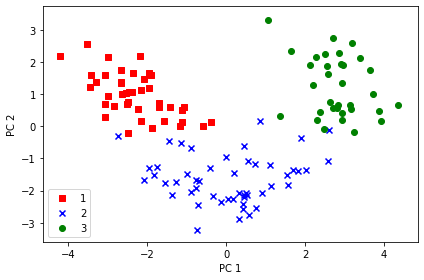

In [13]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

산점도 그리기 위한 목적으로 클래스 레이블 정보를 사용했다. 하지만 PCA는 어떤 클래스 레이블 정보도 사용하지 않는 비지도 학습 기법이라는 점을 잊지 말자.

## 사이킷런의 주성분 분석

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_


array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

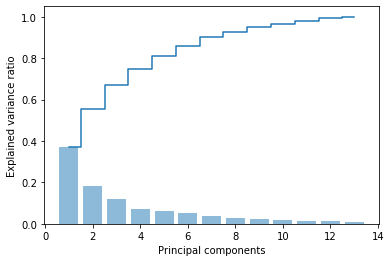

In [15]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [16]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


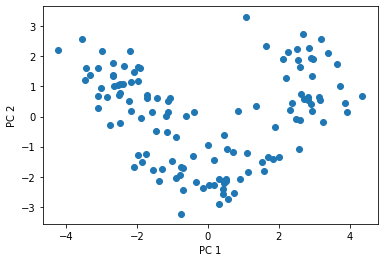

In [17]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [18]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 준비합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스별로 샘플을 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [19]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_pca, y_train)

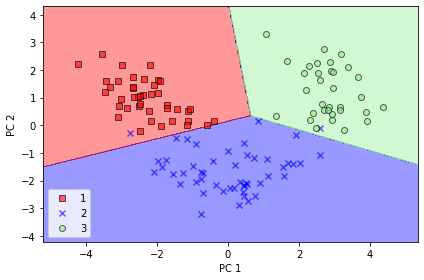

In [20]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()


두 개의 주성분 축으로 줄어든 훈련 데이터에서 만든 결정 경계를 볼 수 있다. 

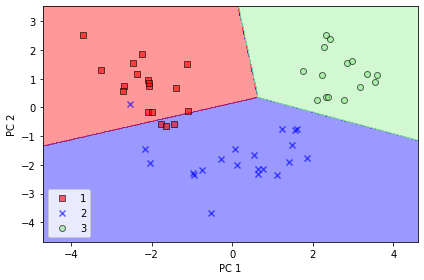

In [21]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()

테스트 데이터셋을 변환하고 로지스틱 회귀가 클래스를 잘 구분하는지 결정 경계를 그려보기

In [22]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

# 선형 판별 분석을 통한 지도 방식의 데이터 압축

**선형 판별 분석**(Linear Discriminant Analysis, LDA)은 규제가 없는 모델에서 차원의 저주로 인한 과대 적합 정도를 줄이고 계산 효율성을 높이기 위한 특성 추출의 기법으로 사용할 수 있다.  
LDA이면에 있는 일반적인 개념은 PCA와 매우 비슷하다. PCA가 데이터셋에 있는 분산이 최대인 직교 성분 축을 찾으려고 하는 반면, LDA 목표는 클래스를 최적으로 구분할 수 있는 특성 부분 공간을 찾는 것이다. 

## 주성분 분석 vs 선형 판별 분석

PCA와 LDA 모두 데이터셋의 차원 개수를 줄일 수 있는 선형 변환 기법이다. 전자는 비지도 학습 알고리즘이지만 후자는 지도 학습 알고리즘이다. 따라서 **LDA**가 PCA보다 *분류 작업에서 더 뛰어난 특성 추출 기법*이라고 생각할 수 있다. 

In [23]:
Image(url='https://git.io/Jtsv8', width=400) 

$x$축(LD 1)으로 투영하는 선형 판별 벡터는 두 개의 정규 분포 클래스를 잘 구분한다. $y$축(LD 2)으로 투영하는 선형 판별 벡터는 데이터셋에 있는 분산을 많이 잡아내지만 클래스 판별 정보가 없기 떄문에 좋은 선형 판별 벡터가 되지 못한다.   

## 산포 행렬 계산

In [24]:
# 각 클래스에 대한 평균 벡터를 계산
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [25]:
# 클래스 내 산포 행렬을 계산
d = 13 # 특성의 수
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # 각 클래스에 대한 산포 행렬
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # 열 벡터를 만듭니다
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # 클래스 산포 행렬을 더합니다

print('클래스 내의 산포 행렬: %sx%s' % (S_W.shape[0], S_W.shape[1]))

클래스 내의 산포 행렬: 13x13


In [26]:
# 클래스가 균일하게 분포되어 있지 않기 때문에 공분산 행렬을 사용하는 것이 더 낫다.
print('클래스 레이블 분포: %s' 
      % np.bincount(y_train)[1:])

클래스 레이블 분포: [41 50 33]


In [27]:
d = 13  # 특성의 수
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('스케일 조정된 클래스 내의 산포 행렬: %sx%s' % 
      (S_W.shape[0], S_W.shape[1]))

스케일 조정된 클래스 내의 산포 행렬: 13x13


In [28]:
# 클래스 간 산포 행렬을 계산한다.
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # 열 벡터로 만들기
d = 13  # 특성 개수
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # 열 벡터로 만들기
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('클래스 간의 산포 행렬: %sx%s' % (S_B.shape[0], S_B.shape[1]))

클래스 간의 산포 행렬: 13x13


## 새로운 특성 부분 공간을 위해 선형 판별 벡터 선택하기

행렬$S_{w}^{-1}S_{B}$의 일반적인 고윳값 분해 문제를 푼다.

In [29]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [30]:
# (고윳값, 고유벡터) 튜플의 리스트를 만듭니다.
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# (고윳값, 고유벡터) 튜플을 큰 값에서 작은 값 순서대로 정렬합니다.
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# 고윳값의 역순으로 올바르게 정렬되었는지 확인합니다.
print('내림차순의 고윳값:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

내림차순의 고윳값:

349.617808905994
172.76152218979394
5.684341886080802e-14
3.63360048868007e-14
2.9156879278165203e-14
2.9156879278165203e-14
1.6567701054331684e-14
1.6567701054331684e-14
1.6005457633433247e-14
1.6005457633433247e-14
1.4744591544911198e-14
6.2713986138368715e-15
2.0474258990949274e-15


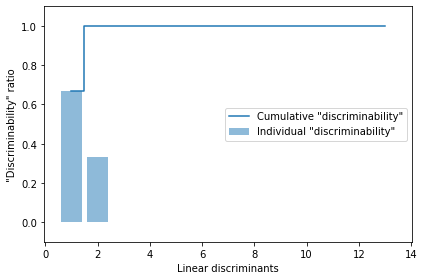

In [31]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='Individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

결과 그래프에서 볼 수 있듯이 처음 두 개의 선형 판별 벡터가 Wine 데이터셋에 있는 정보 중 거의 100%를 잡아낸다. 

In [32]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('행렬 W:\n', w)


행렬 W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


## 새로운 특성 공간으로 샘플 투영

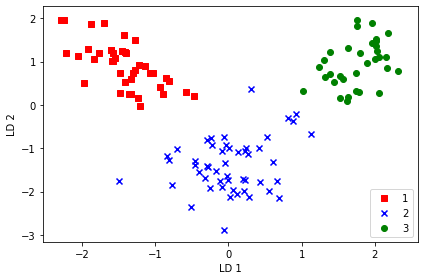

In [33]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_08.png', dpi=300)
plt.show()

## 사이킷런의 LDA

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

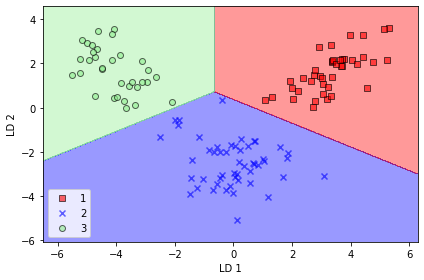

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

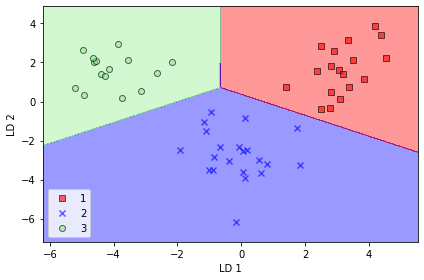

In [36]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_10.png', dpi=300)
plt.show()

# 커널 PCA를 사용하여 비선형 매핑

많은 머신 러닝 알고리즘은 입력 데이터가 선형적으로 구분 가능하다는 가정을 한다. 퍼셉트론은 수렴하기 위해 훈련 데이터가 선형적으로 완벽하게 분리 가능해야 한다고 배웠다.  

실전 애플리케이션에서는 비선형 문제를 더 자주 맞닥뜨릴 것이다. 이런 비선형 문제를 다루어야 한다면 PCA와 LDA 같은 차원 축소를 위한 선형 변환 기법은 최선의 선택이 아니다. 

In [37]:

Image(url='https://git.io/JtsvB', width=500) 

기본적으로 커널 함수(또는 간단히 커널(kernel))는 두 벡터 사이의 점곱을 계산할 수 있는 함수이다.  
즉, 유사도를 측정할 수 있는 함수이다. 

## 파이썬으로 커널 PCA 구현

In [38]:
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import numpy as np

from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version

# scipy 2.0.0에서 삭제될 예정이므로 대신 numpy.exp를 사용합니다.
if scipy_version >= Version('1.4.1'):
    from numpy import exp
else:
    from scipy import exp


def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF 커널 PCA 구현

    매개변수
    ------------
    X: {넘파이 ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      RBF 커널 튜닝 매개변수
        
    n_components: int
      반환할 주성분 개수

    반환값
    ------------
     X_pc: {넘파이 ndarray}, shape = [n_samples, k_features]
       투영된 데이터셋

    """
    # MxN 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱을 계산합니다.
    sq_dists = pdist(X, 'sqeuclidean')

    # 샘플 간의 거리를 정방 대칭 행렬로 변환합니다.
    mat_sq_dists = squareform(sq_dists)

    # 커널 행렬을 계산합니다.
    K = exp(-gamma * mat_sq_dists)

    # 커널 행렬을 중앙에 맞춥니다.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # 중앙에 맞춰진 커널 행렬의 고윳값과 고유벡터를 구합니다.
    # scipy.linalg.eigh 함수는 오름차순으로 반환합니다.
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # 최상위 k 개의 고유벡터를 선택합니다(결과값은 투영된 샘플입니다).
    X_pc = np.column_stack([eigvecs[:, i]
                            for i in range(n_components)])

    return X_pc

/var/folders/tb/x7hcv5j94gn9b46c7qc1vfth0000gn/T/ipykernel_15741/474102093.py:9: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if scipy_version >= Version('1.4.1'):


### 예제 1: 반달 모양 구분하기

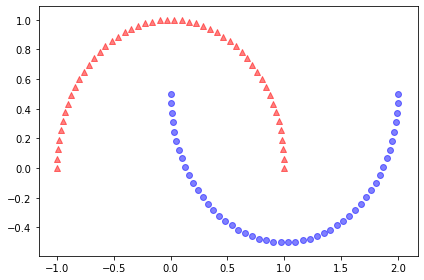

In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_12.png', dpi=300)
plt.show()

기본 PCA의 주성분에 데이터셋을 투영하면 어떻게 보이는지 확인.

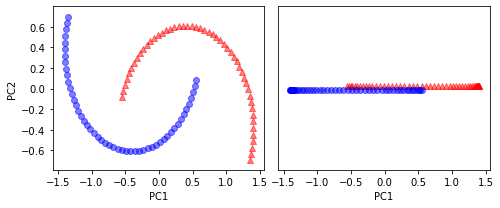

In [40]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_13.png', dpi=300)
plt.show()

구해진 결과를 보면 확실히 기본 PCA로 변환된 데이터셋을 선형 분류기가 잘 구분할 수 없을 것 같다.  

왼쪽 그래프를 보면 원래 반달 모양이 조금만 변형되고 수직 축을 기준으로 반전되었다. 이 변환은 동그라미와 삼각형 사이를 판별하는 선형 분류기에 도움이 되지 않는다. 비슷하게 두 개의 반달 모양을 구성하는 동그라미와 삼각형은 오른쪽 그래프처럼 1차원 특성 축에 투영하면 선형적으로 구분 가능하지 않다. 

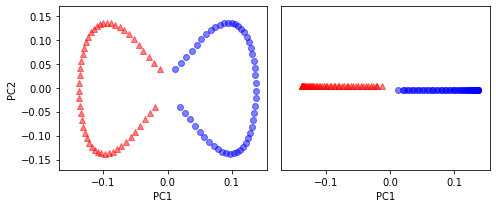

In [41]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50, 1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50, 1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_14.png', dpi=300)
plt.show()

이제 두 클래스(동그라미와 삼각형)는 선형적으로 구분이 잘 되므로 선형 분류기를 위한 훈련 데이터로 적합하다. 

### 예제 2: 동심원 분리하기

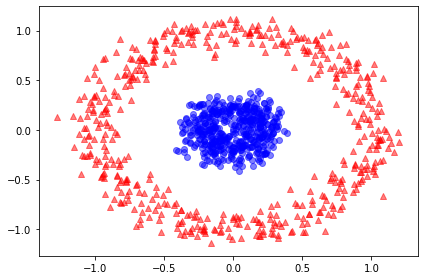

In [42]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_15.png', dpi=300)
plt.show()

기본 PCA를 적용.

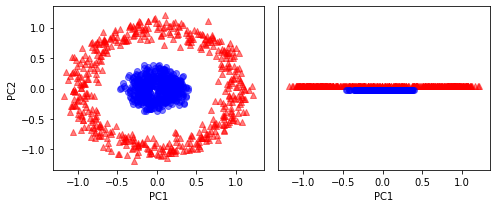

In [43]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_16.png', dpi=300)
plt.show()


여기서도 기본 PCA는 선형 분류기에 적합한 결과를 만들 수 없다.  

적절한 $\gamma$ 값을 주고 RBF 커널 PCA 구현을 사용.

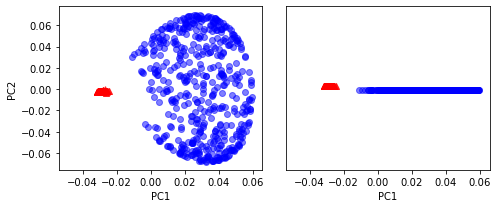

In [44]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_17.png', dpi=300)
plt.show()

RBF 커널 PCA가 두 클래스를 선형적으로 구분할 수 있는 새로운 부분 공간으로 데이터를 투영.

## 새로운 데이터 포인트 투영

앞선 커널 PCA의 두 예제에서 하나의 데이터셋을 새로운 특성에 투영했다. 실전 애플리케이션에서는 변환해야 할 데이터셋이 하나 이상이다.   
예를 들어 훈련 데이터셋과 테스트 데이터셋이다. 모델을 구축하고 평가한 수 수집한 새로운 샘플도 이에 해당한다.

In [45]:
from scipy.spatial.distance import pdist, squareform
from numpy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF 커널 PCA 구현

    매개변수
    ------------
    X: {넘파이 ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      RBF 커널 튜닝 매개변수
        
    n_components: int
      반환할 주성분 개수

    Returns
    ------------
     alphas: {넘파이 ndarray}, shape = [n_samples, k_features]
       투영된 데이터셋
     
     lambdas: list
       고윳값

    """
    # MxN 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱을 계산합니다.
    sq_dists = pdist(X, 'sqeuclidean')

    # 샘플 간의 거리를 정방 대칭 행렬로 변환합니다.
    mat_sq_dists = squareform(sq_dists)

    # 커널 행렬을 계산합니다.
    K = exp(-gamma * mat_sq_dists)

    # 커널 행렬을 중앙에 맞춥니다.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # 중앙에 맞춰진 커널 행렬의 고윳값과 고유 벡터를 구합니다.
    # scipy.linalg.eigh 함수는 오름차순으로 반환합니다.
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # 최상위 k 개의 고유 벡터를 선택합니다(투영 결과).
    alphas = np.column_stack([eigvecs[:, i]
                              for i in range(n_components)])

    # 고유 벡터에 상응하는 고윳값을 선택합니다.
    lambdas = [eigvals[i] for i in range(n_components)]

    return alphas, lambdas

In [46]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

In [48]:
x_new = X[25]
x_new

array([1.8713, 0.0093])

In [49]:
x_proj = alphas[25] # 원본 투영
x_proj

array([0.0788])

In [50]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

# 새로운 데이터포인트를 투영합니다.
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj 

array([0.0788])

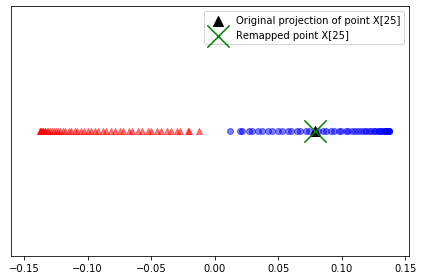

In [51]:
plt.scatter(alphas[y == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
            label='Original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
            label='Remapped point X[25]', marker='x', s=500)
plt.yticks([], [])
plt.legend(scatterpoints=1)

plt.tight_layout()
# plt.savefig('images/05_18.png', dpi=300)
plt.show()

## 사이킷런의 커널 PCA

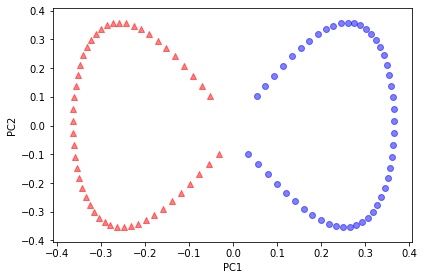

In [52]:
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
# plt.savefig('images/05_19.png', dpi=300)
plt.show()

사이킷런의 매니폴드 알고리즘을 반달 모양 데이터셋과 동심원 데이터셋에 적용. 먼저 변환된 2차원 데이터셋을 그래프로 그리기 위한 간단한 함수를 정의

In [53]:
def plot_manifold(X, y, savefig_name):
    
    plt.scatter(X[y == 0, 0], X[y == 0, 1], 
                color='red', marker='^', alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1],
                color='blue', marker='o', alpha=0.5)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.tight_layout()
    # plt.savefig(savefig_name, dpi=300)
    plt.show()

지역 선형 임베딩(Locally Linear Embedding)은 이웃한 샘플 간의 거리를 유지하는 저차원 투영을 찾는다. 지역 선형 임베딩을 구현한 사이킷런의 `LocallyLinearEmbedding` 클래스를 앞에서 적재한 반달 모양 데이터셋에 적용해보자. 

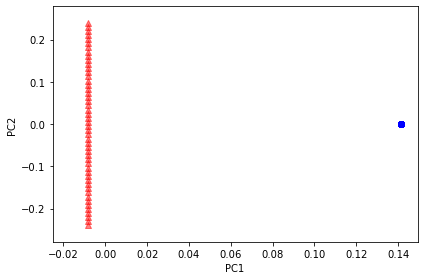

In [54]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=1)
X_lle = lle.fit_transform(X)

plot_manifold(X_lle, y, 'images/05_lle_moon.png')

t-SNE(t-distributed Stochastic Neighbor Embedding)는 데이터 포인트 간의 유사도를 결합 확률(joint probability)로 변환하고, 저차원과 고차원의 확률 사이에서 쿨백-라이블러(Kullback-Leibler) 발산을 최소화한다.  
t-SNE는 특히 고차원 데이터셋을 시각화하는데 뛰어난 성능을 낸다.  
사이킷런에는 `TSNE` 클래스에 구현되어 있다. 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


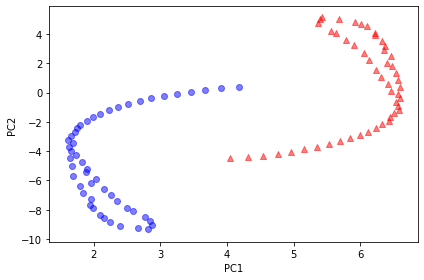

In [55]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X)

plot_manifold(X_tsne, y, 'images/05_tsne_moon.png')

위와 비슷한 방식으로 `KernelPCA`, `LocallyLinearEmbedding`, `TSNE`를 동심원 데이터셋에 적용.

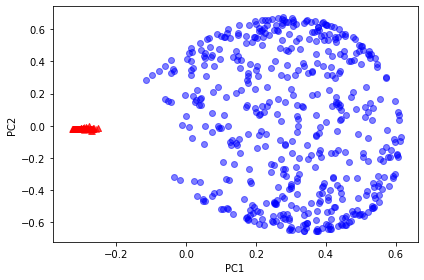

In [56]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plot_manifold(X_skernpca, y, 'images/05_kpca_circles.png')

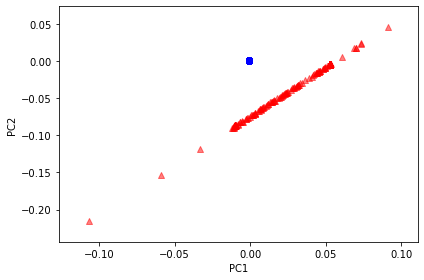

In [57]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=1)
X_lle = lle.fit_transform(X)

plot_manifold(X_lle, y, 'images/05_lle_circles.png')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


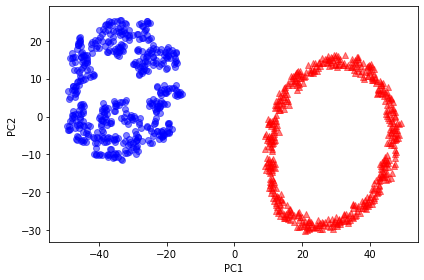

In [58]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X)

plot_manifold(X_tsne, y, 'images/05_tsne_circles.png')